<a href="https://colab.research.google.com/github/seo-jeong-bang/like_code/blob/main/%EB%AC%BC%EB%A5%98_%EC%9C%A0%ED%86%B5%EB%9F%89_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



데이터불러오기
```



In [3]:
import pandas as pd
from google.colab import files
myfile = files.upload()



Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [9]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')



2. 데이터 전처리 과정

In [10]:
train.head()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         31684 non-null  int64 
 1   송하인_격자공간고유번호  31684 non-null  int64 
 2   수하인_격자공간고유번호  31684 non-null  int64 
 3   물품_카테고리       31684 non-null  object
 4   운송장_건수        31684 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [14]:
#데이터 결측치 확인
train.isnull().sum()

index           0
송하인_격자공간고유번호    0
수하인_격자공간고유번호    0
물품_카테고리         0
운송장_건수          0
dtype: int64

In [18]:
#문자를 숫자화 하기 위하여 labelEncoder를 이용
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
encoder.fit(train['물품_카테고리'])

train['물품_카테고리'] = encoder.transform(train['물품_카테고리'])
test['물품_카테고리'] = encoder.transform(test['물품_카테고리'])


In [19]:
train_X = train.drop('운송장_건수',axis = 1)
train_Y = train['운송장_건수']

In [ ]:
#모델 정의
#GradientBoostingRegressor

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

In [21]:

 #from sklearn.model_selection import train_test_split (TEST,TRAIN 나눌 때 씀)
reg = GradientBoostingRegressor(random_state=0)
reg.fit(train_X,train_Y)
GradientBoostingRegressor(random_state=0)


GradientBoostingRegressor(random_state=0)

In [25]:
reg.predict(train_X [1:2])

array([4.9819313])

In [26]:
 reg.score(train_X, train_Y)

0.17878051273682694

#모델 정의
2.LGBMRegressor

In [55]:
import lightgbm as lgb

In [69]:
from lightgbm import LGBMRegressor

In [74]:
#gbm = LGBMRegressor(objective='regression', num_leaves=31, learning_rate=0.05, n_estimators=20)

In [135]:
lgb = LGBMRegressor(objective='regression',num_leaves=50,
                              learning_rate=0.05, n_estimators=2000,
                              max_bin = 2000, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.8,
                              feature_fraction_seed=10, bagging_seed=10,
                              min_data_in_leaf =5, min_sum_hessian_in_leaf = 11,
                              )
lgb.fit(train_X, train_Y)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=10,
              feature_fraction=0.8, feature_fraction_seed=10,
              learning_rate=0.05, max_bin=2000, min_data_in_leaf=5,
              min_sum_hessian_in_leaf=11, n_estimators=2000, num_leaves=50,
              objective='regression')

In [134]:
print(lgb.score(train_X,train_Y))

0.8039023663471785


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_

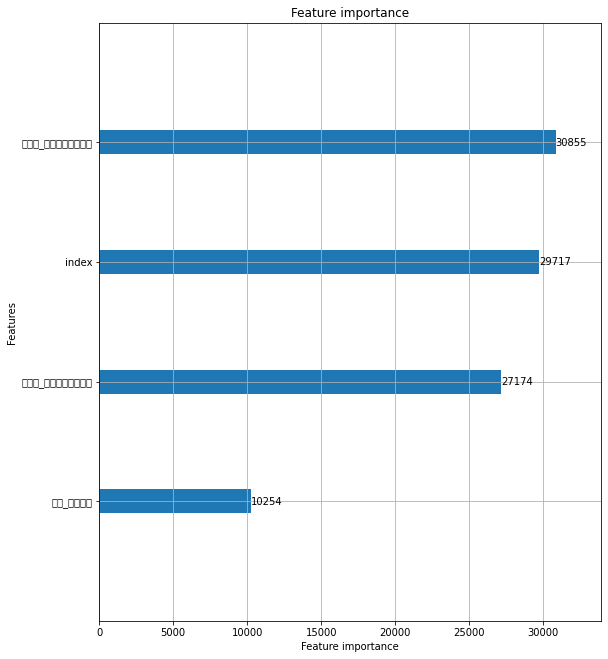

In [138]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots (figsize=(9,11))
plot_importance(lgb,ax=ax)